# Label EDA _ 2nd (about "Noisy field" vs. 4 others)

In [1]:
import pandas as pd

In [2]:
# label_g1 = pd.read_csv("7. UAB label reshape grader1 (drop NaN).csv")
label_g1 = pd.read_csv("11. Grader1_labels_VF.csv")

# label_g2 = pd.read_csv("8. UAB label reshape grader2 (drop NaN).csv")
# label_OR = pd.read_csv("9. UAB label reshape OR (drop NaN).csv")
# label_AND = pd.read_csv("10. UAB label reshape AND (drop NaN).csv")

In [3]:
print("The shape of label_g1 is", label_g1.shape)
# print("The shape of label_g2 is", label_g2.shape)
# print("The shape of label_OR is", label_OR.shape)
# print("The shape of label_AND is", label_AND.shape)

The shape of label_g1 is (301, 302)


In [4]:
label_g1.columns

Index(['record_id', 'ptid', 'vstdate', 'OD_flag', 'Eye', 'sad', 'iad', 'dad',
       'sns', 'ins',
       ...
       'PD_NUM_45', 'PD_NUM_46', 'PD_NUM_47', 'PD_NUM_48', 'PD_NUM_49',
       'PD_NUM_50', 'PD_NUM_51', 'PD_NUM_52', 'PD_NUM_53', 'PD_NUM_54'],
      dtype='object', length=302)

In [5]:
l_all = ['record_id', 'ptid', 'vstdate', 'OD_flag', 'Eye', 
         'sad', 'iad', 'dad','sns', 'ins', 
         'cd', 'ci', 'tw', 'ls', 'ahfl', 
         'nhfl', 'apcre', 'efp', 'efth', 'tld', 
         'nf', 'normal', 'abnormal', 'md', 'ms']
len(l_all)

25

In [6]:
l = ['sad', 'iad', 'dad','sns', 'ins', 
     'cd', 'ci', 'tw', 'ls', 'ahfl', 
     'nhfl', 'apcre', 'efp', 'efth', 'tld', 
     'nf', 'normal', 'abnormal', 'md', 'ms']
len(l)

20

# 1. Frequency

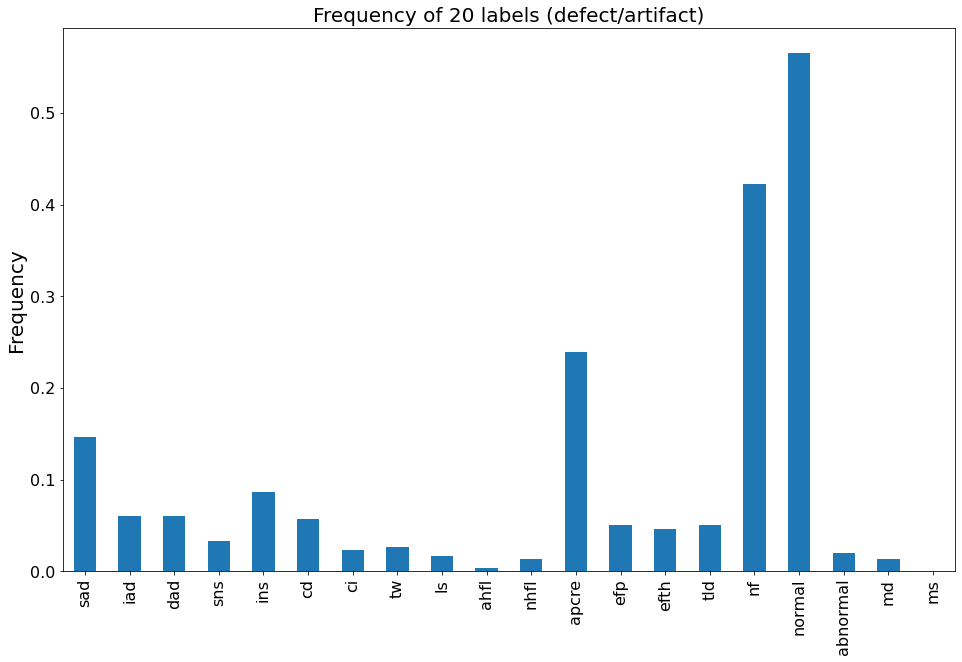

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

ax = (label_g1[l].sum()/label_g1.shape[0]).plot(kind='bar')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Frequency', fontsize = 20)
plt.title('Frequency of 20 labels (defect/artifact)', fontsize=20)
#### or: ax = df.plot.bar(x='', y='', rot=0)

plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Output Image/Label EDA.png')

In [8]:
df = label_g1[l].sum()
type(df)

pandas.core.series.Series

In [9]:
label_g1.shape[0]

301

- **normal**: Field appears normal (a. No evidence of glaucomatous or other damage ; b. Artifacts may be present if this is indicated.)
- **nf**: Noisy field

# 2. Noisy Field (nf) vs. normal

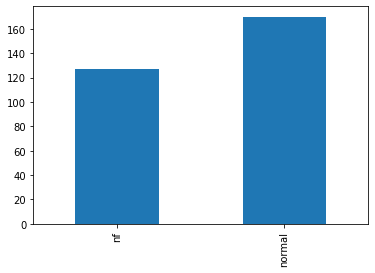

In [10]:
ax = label_g1[['nf', 'normal']].sum().plot(kind='bar')

In [11]:
label_g1["normal"].sum()

170.0

In [12]:
label_g1["abnormal"].sum()

6.0

In [13]:
label_g1["nf"].sum()

127.0

Text(0.5, 1.0, '170 Normal Cases (in total)')

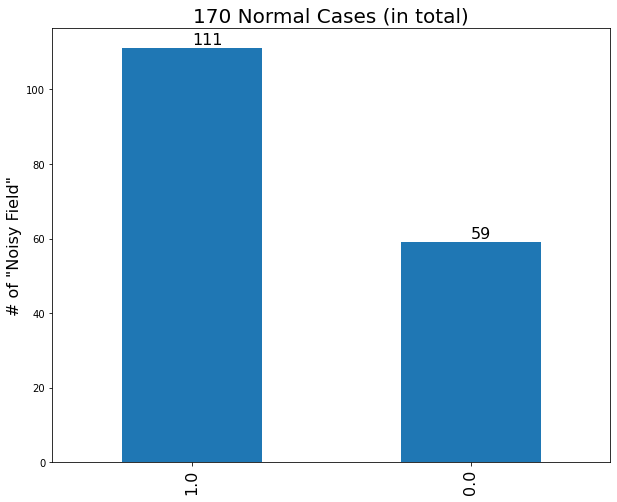

In [14]:
plt.figure(figsize=(10,8))
label_g1[label_g1.normal==1]['nf'].value_counts().plot(kind='bar')
plt.ylabel('# of "Noisy Field"', fontsize = 16)
plt.xticks(fontsize=16)
plt.text(0, 112, "111",  fontsize = 16)
plt.text(1, 60, "59", fontsize = 16)
plt.title('170 Normal Cases (in total)', fontsize=20)

In [15]:
label_g1[label_g1.normal==1]['nf'].value_counts()

1.0    111
0.0     59
Name: nf, dtype: int64

In [16]:
label_g1[label_g1.normal==1]['nf'].value_counts().shape

(2,)

In [17]:
y = label_g1[label_g1.normal==1]['nf'].value_counts().to_numpy()
x = [0,1]
labels = ['noisy field', '(not) noisy field']
print("The type of y is", type(y))
print("The type of x is", type(x))

The type of y is <class 'numpy.ndarray'>
The type of x is <class 'list'>


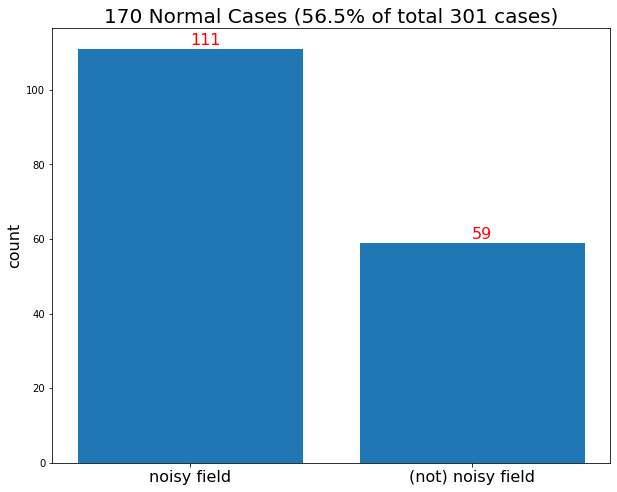

In [18]:
#### A better way to visualize data
plt.figure(figsize=(10,8))

plt.bar(x,y)
plt.xticks(x, labels, fontsize = 16) #rotation='45', 

plt.ylabel('count', fontsize = 16)
plt.text(0, 112, "111",  fontsize = 16, color = 'r')
plt.text(1, 60, "59", fontsize = 16, color = 'r')
plt.title('170 Normal Cases (56.5% of total 301 cases)', fontsize=20)

plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Output Image/1. normal vs. noisy field.png')
plt.show()

# 3. Other defects
- apcre
- efp
- efth
- tld

### 3.1 apcre

In [19]:
label_g1["apcre"].sum()

72.0

In [20]:
print("The shape is", label_g1[label_g1.normal==1]['apcre'].value_counts().shape)
print("The type is", type(label_g1[label_g1.normal==1]['apcre'].value_counts()))
label_g1[label_g1.normal==1]['apcre'].value_counts()

The shape is (2,)
The type is <class 'pandas.core.series.Series'>


0.0    140
1.0     30
Name: apcre, dtype: int64

In [21]:
y = label_g1[label_g1.normal==1]['apcre'].value_counts().to_numpy()
x = [0,1]
labels = ['(not) apcre', 'apcre']
print("The type of y is", type(y))
print("The type of x is", type(x))

The type of y is <class 'numpy.ndarray'>
The type of x is <class 'list'>


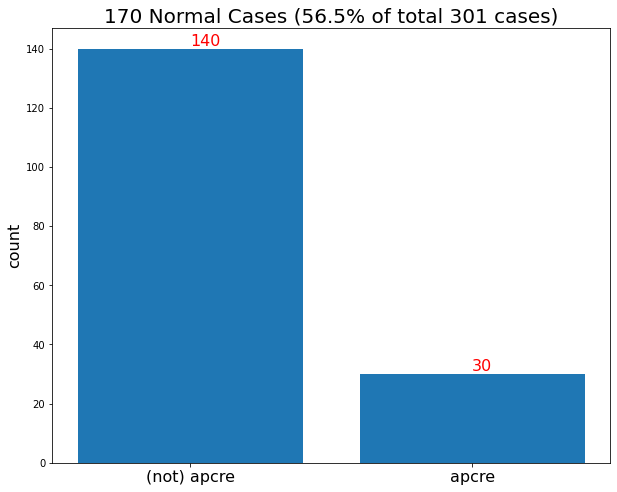

In [22]:
#### A better way to visualize data
plt.figure(figsize=(10,8))

plt.bar(x,y)
plt.xticks(x, labels, fontsize = 16) #rotation='45', 

plt.ylabel('count', fontsize = 16)
plt.text(0, 141, "140",  fontsize = 16, color = 'r')
plt.text(1, 31, "30", fontsize = 16, color = 'r')
plt.title('170 Normal Cases (56.5% of total 301 cases)', fontsize=20)

plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Output Image/2. normal vs. apcre.png')
plt.show()

### 3.2 efp

In [23]:
label_g1["efp"].sum()

15.0

In [24]:
print("The shape is", label_g1[label_g1.normal==1]['efp'].value_counts().shape)
print("The type is", type(label_g1[label_g1.normal==1]['efp'].value_counts()))
label_g1[label_g1.normal==1]['efp'].value_counts()

The shape is (2,)
The type is <class 'pandas.core.series.Series'>


0.0    156
1.0     14
Name: efp, dtype: int64

In [25]:
y = label_g1[label_g1.normal==1]['efp'].value_counts().to_numpy()
x = [0,1]
labels = ['(not) efp', 'efp']
print("The type of y is", type(y))
print("The type of x is", type(x))

The type of y is <class 'numpy.ndarray'>
The type of x is <class 'list'>


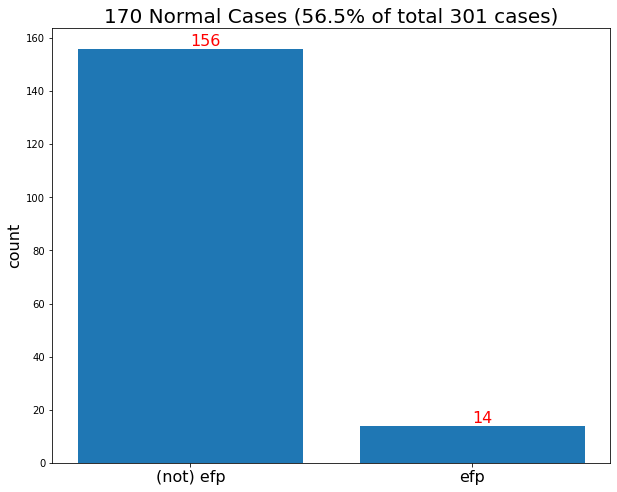

In [26]:
#### A better way to visualize data
plt.figure(figsize=(10,8))

plt.bar(x,y)
plt.xticks(x, labels, fontsize = 16) #rotation='45', 

plt.ylabel('count', fontsize = 16)
plt.text(0, 157, "156",  fontsize = 16, color = 'r')
plt.text(1, 15, "14", fontsize = 16, color = 'r')
plt.title('170 Normal Cases (56.5% of total 301 cases)', fontsize=20)

plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Output Image/3. normal vs. efp.png')
plt.show()

### 3.3 efth

In [27]:
label_g1["efth"].sum()

14.0

In [28]:
print("The shape is", label_g1[label_g1.normal==1]['efth'].value_counts().shape)
print("The type is", type(label_g1[label_g1.normal==1]['efth'].value_counts()))
label_g1[label_g1.normal==1]['efth'].value_counts()

The shape is (2,)
The type is <class 'pandas.core.series.Series'>


0.0    157
1.0     13
Name: efth, dtype: int64

In [29]:
y = label_g1[label_g1.normal==1]['efth'].value_counts().to_numpy()
x = [0,1]
labels = ['(not) efth', 'efth']
print("The type of y is", type(y))
print("The type of x is", type(x))

The type of y is <class 'numpy.ndarray'>
The type of x is <class 'list'>


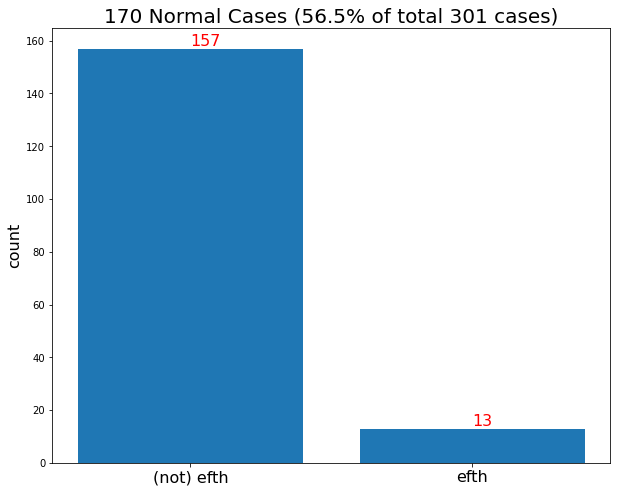

In [30]:
#### A better way to visualize data
plt.figure(figsize=(10,8))

plt.bar(x,y)
plt.xticks(x, labels, fontsize = 16) #rotation='45', 

plt.ylabel('count', fontsize = 16)
plt.text(0, 158, "157",  fontsize = 16, color = 'r')
plt.text(1, 14, "13", fontsize = 16, color = 'r')
plt.title('170 Normal Cases (56.5% of total 301 cases)', fontsize=20)

plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Output Image/4. normal vs. efth.png')
plt.show()

### 3.4 tld

In [31]:
label_g1["tld"].sum()

15.0

In [32]:
print("The shape is", label_g1[label_g1.normal==1]['tld'].value_counts().shape)
print("The type is", type(label_g1[label_g1.normal==1]['tld'].value_counts()))
label_g1[label_g1.normal==1]['tld'].value_counts()

The shape is (2,)
The type is <class 'pandas.core.series.Series'>


0.0    157
1.0     13
Name: tld, dtype: int64

In [33]:
y = label_g1[label_g1.normal==1]['tld'].value_counts().to_numpy()
x = [0,1]
labels = ['(not) tld', 'tld']
print("The type of y is", type(y))
print("The type of x is", type(x))

The type of y is <class 'numpy.ndarray'>
The type of x is <class 'list'>


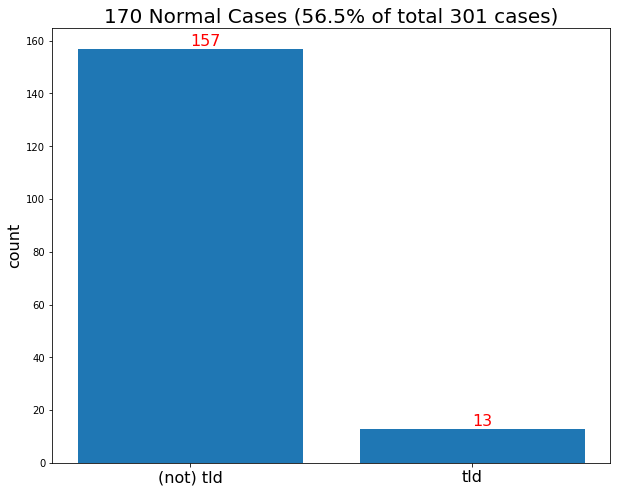

In [34]:
#### A better way to visualize data
plt.figure(figsize=(10,8))

plt.bar(x,y)
plt.xticks(x, labels, fontsize = 16) #rotation='45', 

plt.ylabel('count', fontsize = 16)
plt.text(0, 158, "157",  fontsize = 16, color = 'r')
plt.text(1, 14, "13", fontsize = 16, color = 'r')
plt.title('170 Normal Cases (56.5% of total 301 cases)', fontsize=20)

plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Output Image/5. normal vs. tld.png')
plt.show()